# Homework 3

## Problem 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

### Part (a)

In [80]:
# Generating samples from specified distribution
np.random.seed(5)
N = 100
k = np.random.binomial(1, 0.6, N)

X = np.zeros(N)

for i, j in enumerate(k):
    if j == 1: 
        X[i] = np.random.normal(-2, 1.5, 1)
    else: 
        X[i] = np.random.normal(3, 1.5, 1)
        
X = X[:, np.newaxis]

### Part (b)

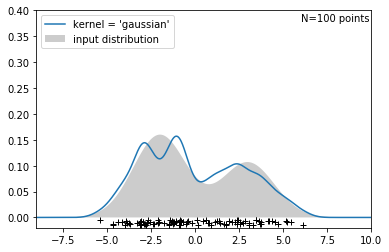

In [81]:
# Plot the kernel density
# Generate equally-spaced points for plotting true density
X_plot = np.linspace(-9, 10, 1000)[:, np.newaxis]

true_dens = (0.6 * norm(-2, 1.5).pdf(X_plot[:, 0])
             + 0.4 * norm(3, 1.5).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

# Fit the KDE model
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
        label="kernel = '{0}'".format('gaussian'))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-9, 10)
ax.set_ylim(-0.02, 0.4)
plt.show()

### Part (c)

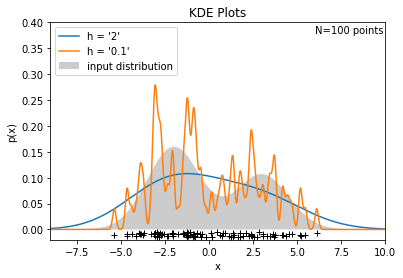

In [82]:
# Only need to generate a new object kde1 and kde2

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')


kde1 = KernelDensity(kernel='gaussian', bandwidth=2).fit(X)
log_dens1 = kde1.score_samples(X_plot)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
log_dens2 = kde2.score_samples(X_plot)

ax.plot(X_plot[:, 0], np.exp(log_dens1), '-',
        label="h = '{0}'".format('2'))
ax.plot(X_plot[:, 0], np.exp(log_dens2), '-',
        label="h = '{0}'".format('0.1'))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-9, 10)
ax.set_ylim(-0.02, 0.4)
plt.title("KDE Plots")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

From the plot we can see that h = 0.1 is overfitting since it's very "noisy", and the blue line h = 2 is under fitting becasue it's way too smooth and doesn't capture the true trends accurately

## Problem 2
### Part (a)

$P(y=1|x) > P(y=0|x)$ is equivalent to P(y=1|x) > 1/2, which is $\frac{1}{1+e^{-z}}>1/2\;$ => $\;e^{-z}<1 \;$ => $\; z>0$   

Therefore we have $1+2x_1+3x_2>0\;$ => $\; 2x_1+3x_2>-1$

### Part (b)
$P(y=1|x)>0.8\;$ => $\;\frac{1}{1+e^{-z}}>0.8\;$ => $\;1+e^{-z}<1.25\;$ => $\;e^{-z}<0.25$ => $e^{z}>4\;$ => $\;z>ln(4)=1.39\;$   
This is equivalent to $1+2x_1+3x_2>1.39\;$ => $\;2x_1+3x_2>0.39$

### Part (c)
From part (b) we have $2x_1+3x_2>0.39$ for $P(y=1|x)>0.8$   
Now if $x_2=0.5$ then $2x_1+1.5>0.39\;$ => $\;x_1>-0.56$

## Problem 3
### Part (a)

Text(0,0.5,'x1')

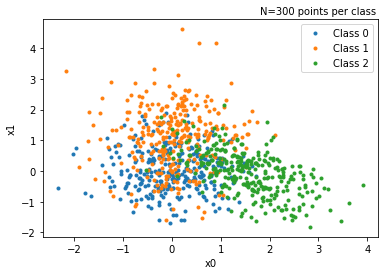

In [84]:
np.random.seed(5)

N = 300
m1 = [0, 0]
m2 = [0, 1]
m3 = [1.5, 0]
cv1 = [[0.5, 0], [0, 0.5]]
cv2 = [[0.5, 0], [0, 1]]
cv3 = [[0.5, -0.25], [-0.25, 0.5]]

# Create the sample dataset matrix X and response y
X1 = np.random.multivariate_normal(m1, cv1, N)
X2 = np.random.multivariate_normal(m2, cv2, N)
X3 = np.random.multivariate_normal(m3, cv3, N)

y = [0]*N + [1]*N + [2]*N

# Plot the data points
plt.plot(X1[:,0], X1[:,1], ".", label = "Class 0")
plt.plot(X2[:,0], X2[:,1], ".", label = "Class 1")
plt.plot(X3[:,0], X3[:,1], ".", label = "Class 2")  


plt.text(1.8, 5.1, "N={0} points per class".format(N))
plt.legend(loc='best')
plt.xlabel('x0')
plt.ylabel('x1')

### Part (b)

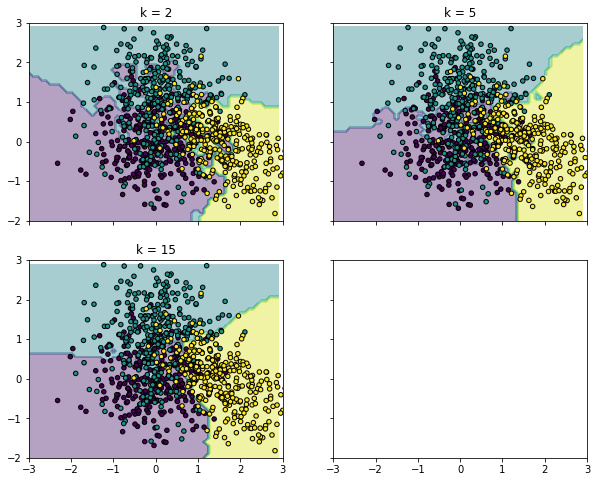

In [85]:
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Concatenate 3 classes into one dataset
X = np.concatenate((X1, X2, X3))
X_tr,X_ts, y_tr,y_ts = train_test_split(X, y, test_size = 0.5, random_state = 1)

# Create the classifier object
clf1 = KNeighborsClassifier(n_neighbors = 2)
clf2 = KNeighborsClassifier(n_neighbors = 5)
clf3 = KNeighborsClassifier(n_neighbors = 15)

clf1.fit(X_tr, y_tr)
clf2.fit(X_tr, y_tr)
clf3.fit(X_tr, y_tr)

# Plot decision regions
x1_min, x1_max = -3, 3
x2_min, x2_max = -2, 3
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['k = 2', 'k = 5',
                         'k = 15']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    axarr[idx[0], idx[1]].set_xlim(-3, 3)
    axarr[idx[0], idx[1]].set_ylim(-2, 3)

plt.show()

Above regions are plotted as required. Bottom right grid is left empty intentionally.

### Part (c)

Text(0,0.5,'MSE')

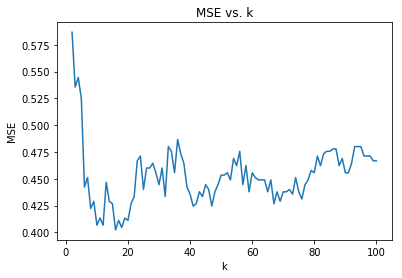

In [88]:
# Create an empty array to store results
mse = np.zeros(99)

# Cross validation
k_test = np.arange(2, 101)
for i, a in enumerate(k_test):
    
    # Fit the model given the current number of k
    clf = KNeighborsClassifier(n_neighbors = a)
    clf.fit(X_tr, y_tr)
    # Predicton testing data
    yhat = clf.predict(X_ts)
    # Calculate MSE
    mse[i] = np.mean((y_ts - yhat)**2)

# Plot the results
plt.plot(k_test, mse, '-')
plt.title("MSE vs. k")
plt.xlabel('k')
plt.ylabel('MSE')

Looks like we have the lowest MSE when k is around 15-20. It is quite noisy since we didn't use K-fold validation.

## Problem 4
### Part (a)

$$\frac{dz_i}{d\beta_0}=1$$
$$\frac{dz_i}{d\beta_1}=